<div class="alert alert-block alert-info">
    <a href="https://www.linkedin.com/in/lopesflavia"><img alt="Flávia Lopes. Let's code :)" src="logo.png" width=250px, align="center"></a>
</div>

<h1>Student Performance Prediction - Portuguese Final Grade</h1>
<div style="margin-top: 20px">
    data description page:     
    <a href="http://archive.ics.uci.edu/ml/datasets/Student+Performance">http://archive.ics.uci.edu/ml/datasets/Student+Performance</a><br>
    data source: <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip" target="_blank">http://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip</a><br>
    data type: csv

</div>

<a id="contents"></a>
<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#acquisition">Data Acquisition and Wrangling</a></li>
        <li><a href="#exploratory">Exploratory Data Analysis: Visualization</a>
            <ol>
                <li><a href="#regplot">Visualizing Continuous Variables With regplot</a></li>
                <li><a href="#boxplot">Visualizing Categoricals Variables With boxplot</a></li>
            </ol>
        </li>
        <li><a href="#features-selected">Features Selected to Model</a></li>
        <li><a href="#data-transform">Data Transforming</a></li>
        <li><a href="#model-development-mlr">From Model Development to Evaluation: MLR</a>  
            <ol>
                <li><a href="#evaluation-measures-in">Measures for In-Sample Evaluation</a></li>
                <li><a href="#evaluation-measures-out">Measures for Out-Sample Evaluation</a></li>
                <li><a href="#evaluation-visualization">Evaluation Using Visualization</a></li>
            </ol>
        </li>        
    </ol>
</div>
<hr>

<a  id="acquisition"></a>
<h2>Data Acquisition and Wrangling</h2>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('student-por.csv', sep=';')

<h3>Carregando o dicionário de dados em DataFrame</h3>
<p>Loads student.txt file, the data dictionary, into a DataFrame for getting info about variables.</p>

In [3]:
import studentInfo as si
about = si.about()

In [4]:
about.school

0    student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
Name: school, dtype: object

<h3>Are There Missing Values in Data? No.</h3>
<p>The count shows 649 entries for all variables.</p>

In [5]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


<p>Is there any missing value in the columns? No.</p>

In [6]:
missing_data = data.isnull()
missing_data.replace(False, '0', inplace=True)
missing_data.replace(True, '1', inplace=True)
missing_data = missing_data.astype('int64')
(missing_data.sum()>=1).any()

False

<h3>Checking Types</h3>

<p>Checking each variable in both data.dtypes and about dataframe we observed that the types are correct.</p>

In [7]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
data['G3'].value_counts()

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
0      15
18     15
7      10
6       3
19      2
5       1
1       1
Name: G3, dtype: int64

<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a  id="exploratory"></a>
<h2>Exploratory Data Analysis: Visualization</h2>

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Plot Histograms - See Distribution (FacetGrid)</h3>

In [10]:
print(about.columns)
about.studytime

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


0    weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
Name: studytime, dtype: object

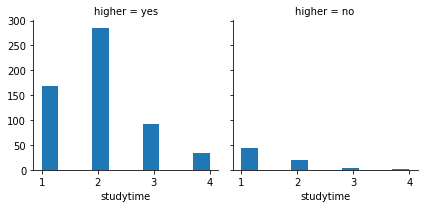

In [11]:
g = sns.FacetGrid(data, col="higher")
g.map(plt.hist, "studytime")

<a  id="regplot"></a>
<h3>Visualizating Continuous Variables With regplot</h3>

<p>A good way to visualize both continuous and target variables is by using regplots.</p>

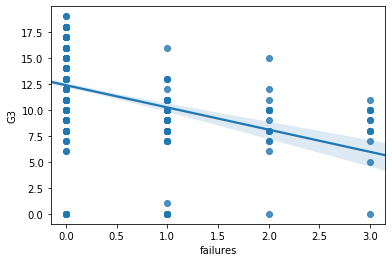

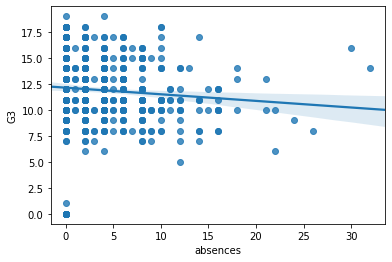

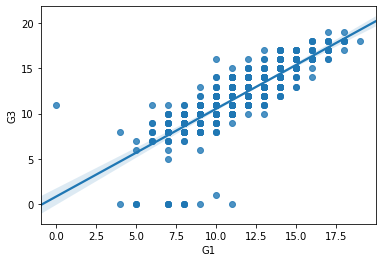

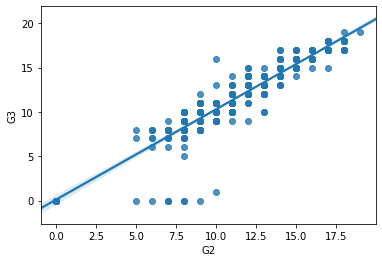

In [12]:
continuous = ['failures','absences','G1','G2']

for it in continuous:
    #aumentando tamanho em 50% tamanho padrão
    #plt.figure(figsize=[9.6,7.2])
    plt.figure()
    sns.regplot(x=it, y='G3', data=data)

<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a  id="boxplot"></a>
<h3>Visualizing Categorical Variables With boxplot</h3>

<p>The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

In [13]:
#There are some categorical numeric features not included here - only object  
categoricals = data.dtypes[data.dtypes == 'object'].index.tolist()

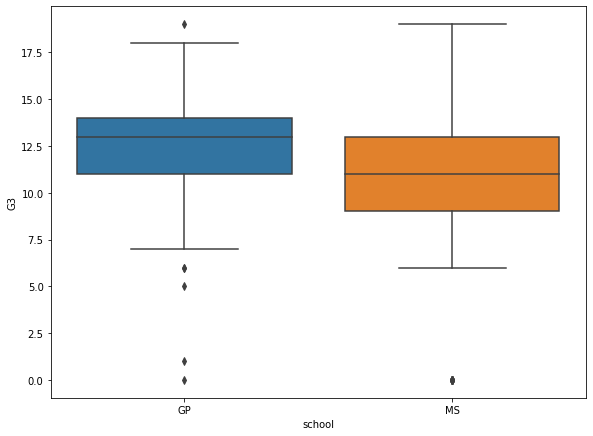

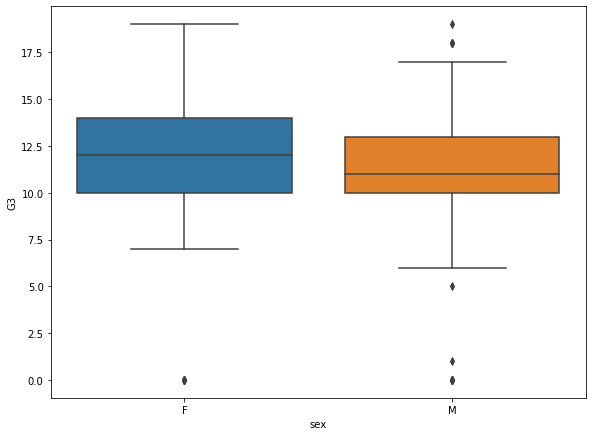

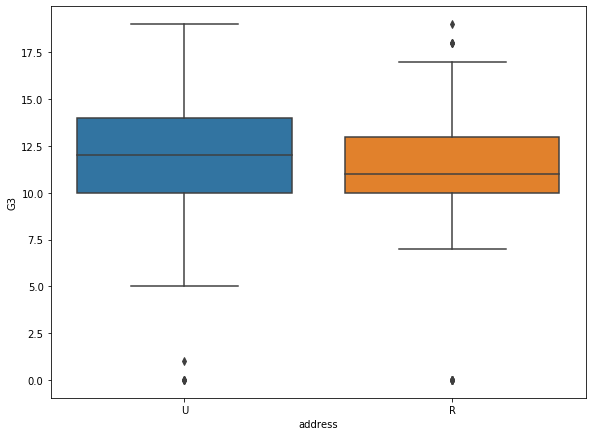

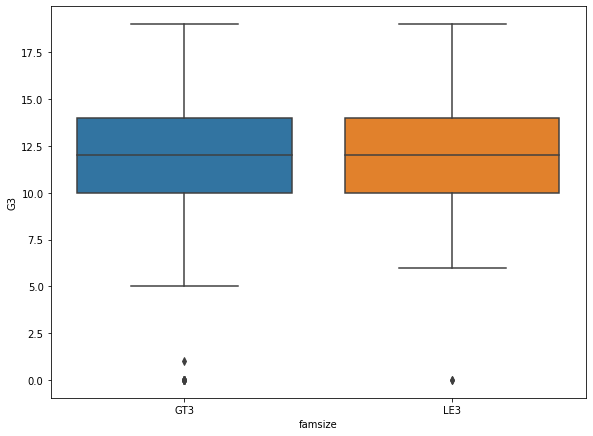

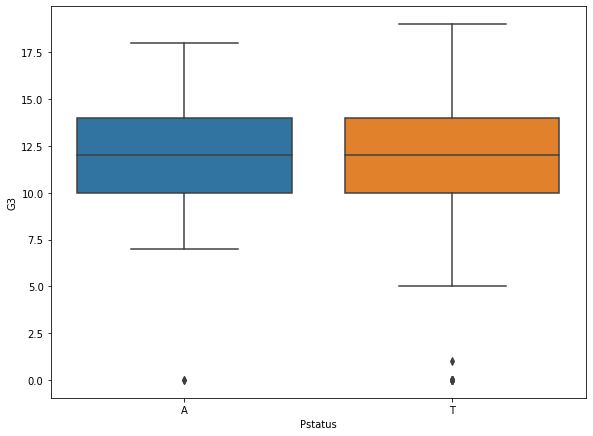

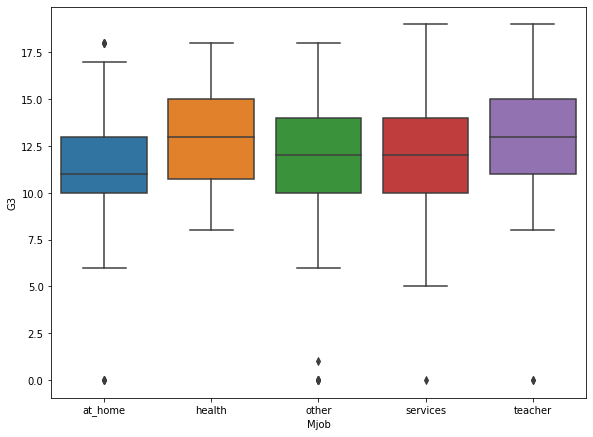

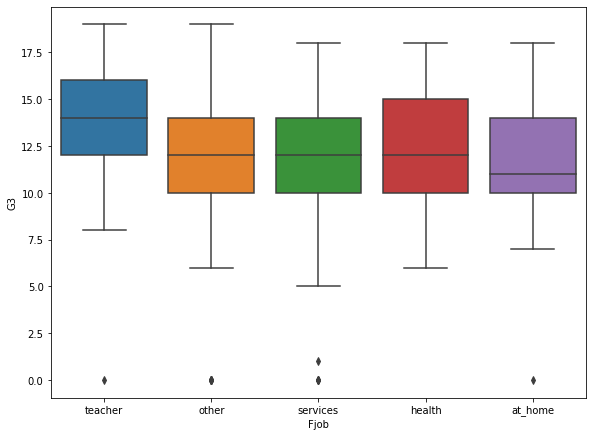

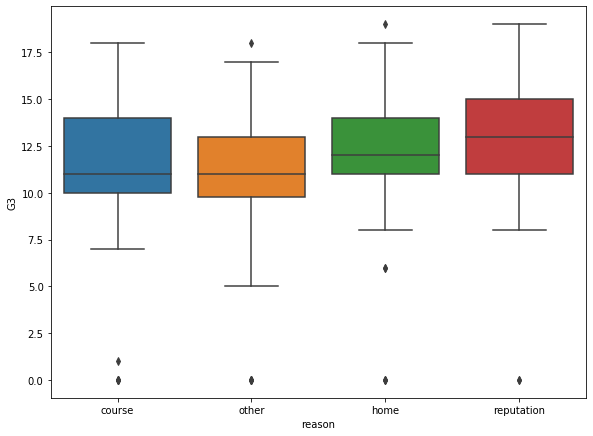

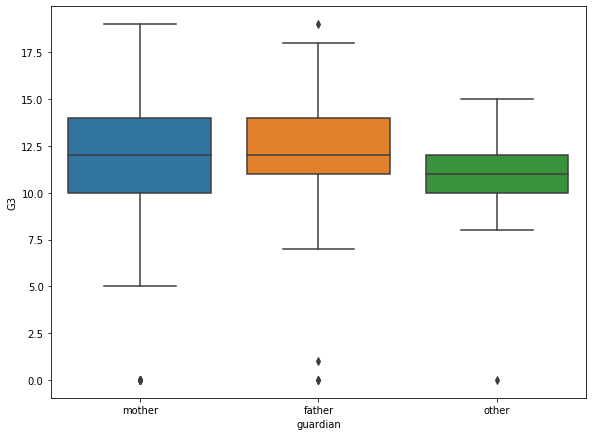

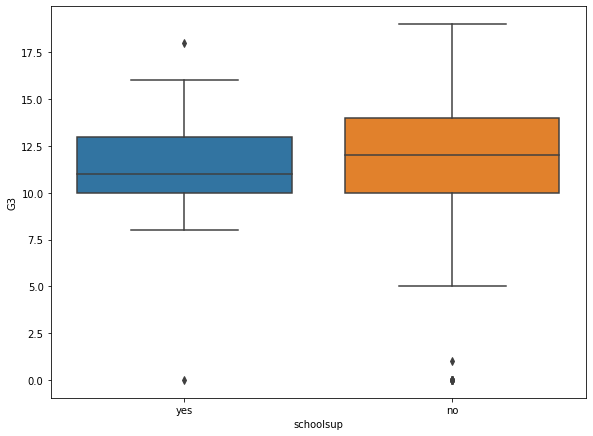

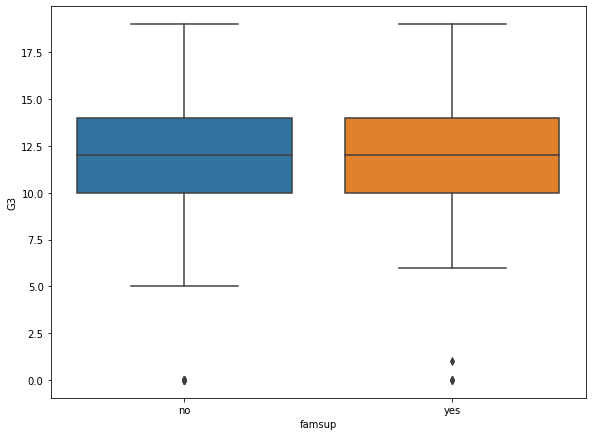

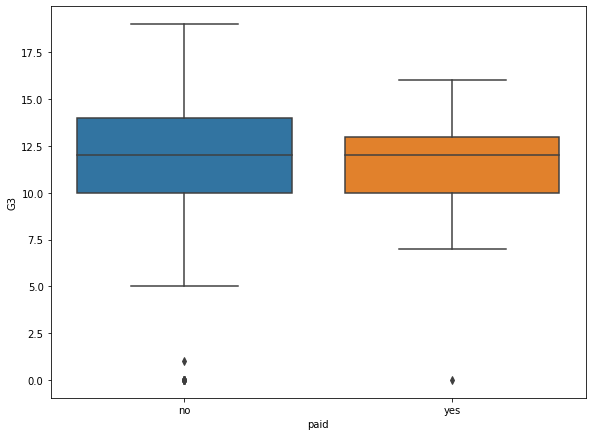

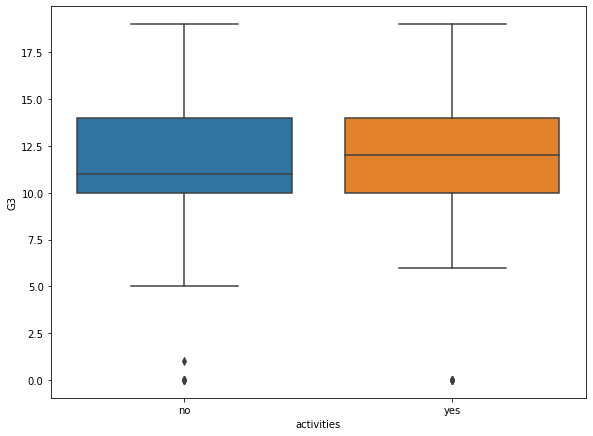

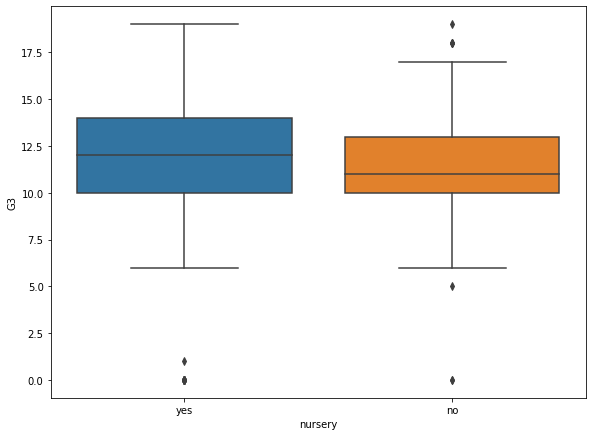

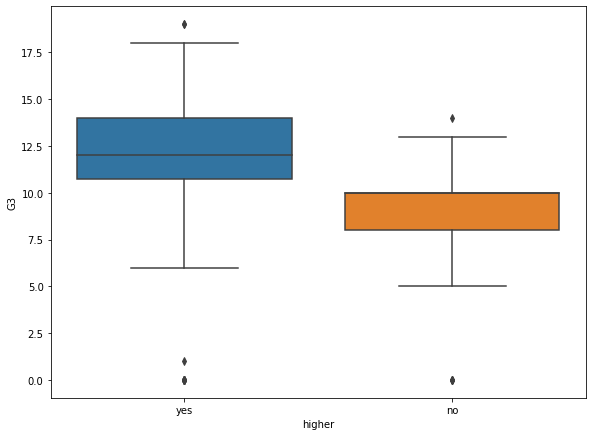

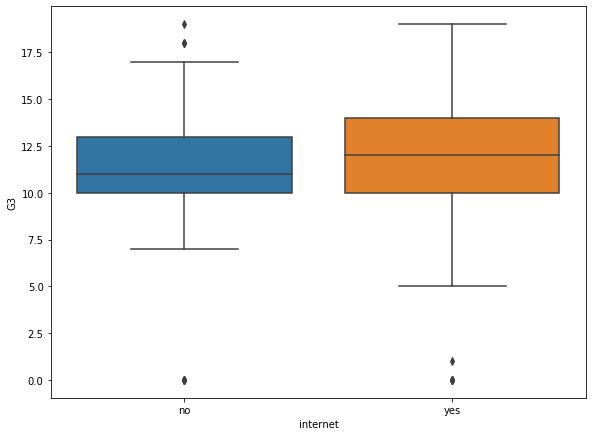

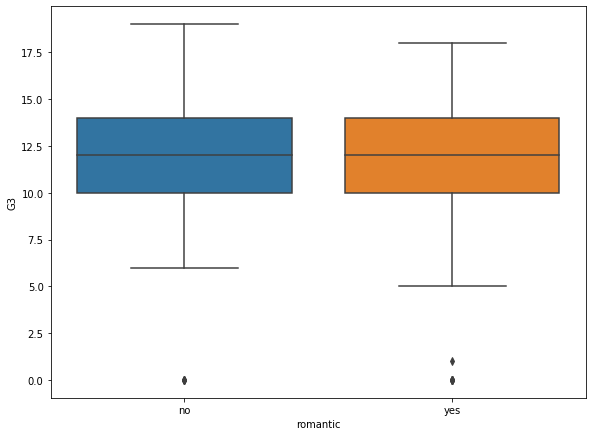

In [14]:
for it in categoricals:
    #aumentando tamanho em 50% tamanho padrão
    plt.figure(figsize=[9.6,7.2])
    sns.boxplot(x=it, y='G3', data=data)

<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a  id="anova"></a>
<h2>ANOVA: Analysis of Variance</h2>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our G3 variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

In [15]:
from scipy import stats

<h4>Binaries Categoricals Variables</h4>
<p>In first, I selected only binaries features (yes-no) among all categorical variables</p>

In [16]:
#vai guardar todos os resultados dos testes ANOVA
all_categoricals = []

In [17]:
binaries_categoricals = data.describe(include='object').columns.tolist()
binaries_categoricals = [it for it in binaries_categoricals if 'yes' in data[it].unique()]

In [18]:
# ANOVA
for it in binaries_categoricals:
    grouped = data[[it,'G3']].groupby(it)
    f_val, p_val = stats.f_oneway(grouped.get_group('yes')['G3'], grouped.get_group('no')['G3']) 
    all_categoricals.append([it, f_val, p_val])
    print( "{} => ANOVA results: F={}, P={}".format(it,f_val,p_val))


schoolsup => ANOVA results: F=2.865641360496058, P=0.09097103846579589
famsup => ANOVA results: F=2.2759054076786045, P=0.13188651204202523
paid => ANOVA results: F=1.9558102256392804, P=0.1624412486356955
activities => ANOVA results: F=2.321335165021925, P=0.12809905950542522
nursery => ANOVA results: F=0.5353162586382413, P=0.46464524309828237
higher => ANOVA results: F=80.24245287906326, P=3.4996595928298785e-18
internet => ANOVA results: F=14.897632348195058, P=0.00012489173447451603
romantic => ANOVA results: F=5.35272292081948, P=0.02100247152464982


<p>I concluded that higher is the best binary variable to predict G3 and internet should to be considerate, although its small F-test score.</p>

<h4>No Binaries Categoricals Variables</h4>
<p>Variables with more than 2 values</p>

In [19]:
no_binaries_categoricals = data.describe(include='object').columns.tolist()
[no_binaries_categoricals.remove(it) for it in binaries_categoricals]
#these are the no binaries variables and your data range
[(it,data[it].unique().tolist()) for it in no_binaries_categoricals]

[('school', ['GP', 'MS']),
 ('sex', ['F', 'M']),
 ('address', ['U', 'R']),
 ('famsize', ['GT3', 'LE3']),
 ('Pstatus', ['A', 'T']),
 ('Mjob', ['at_home', 'health', 'other', 'services', 'teacher']),
 ('Fjob', ['teacher', 'other', 'services', 'health', 'at_home']),
 ('reason', ['course', 'other', 'home', 'reputation']),
 ('guardian', ['mother', 'father', 'other'])]

In [20]:
grouped = data[['school','G3']].groupby('school')
f_val, p_val = stats.f_oneway(grouped.get_group('GP')['G3'], grouped.get_group('MS')['G3']) 

all_categoricals.append(['school', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=56.89067686337133, P=1.5661990923002604e-13


<p>school is a strong predictor</p>

In [21]:
grouped = data[['sex','G3']].groupby('sex')
f_val, p_val = stats.f_oneway(grouped.get_group('F')['G3'], grouped.get_group('M')['G3']) 

all_categoricals.append(['sex', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=10.962308407124874, P=0.0009815287061373291


<p>sex is a moderate predictor (small F-test)</p>

In [22]:
grouped = data[['address','G3']].groupby('address')
f_val, p_val = stats.f_oneway(grouped.get_group('U')['G3'], grouped.get_group('R')['G3']) 

all_categoricals.append(['address', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=18.707910527412754, P=1.7641534609222376e-05


<p>address is a good predictor</p>

In [23]:
grouped = data[['famsize','G3']].groupby('famsize')
f_val, p_val = stats.f_oneway(grouped.get_group('GT3')['G3'], grouped.get_group('LE3')['G3']) 

all_categoricals.append(['famsize', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=1.3137906447644496, P=0.2521332216658235


<p>famsize is a bad predictor</p>

In [24]:
grouped = data[['Pstatus','G3']].groupby('Pstatus')
f_val, p_val = stats.f_oneway(grouped.get_group('A')['G3'], grouped.get_group('T')['G3']) 

all_categoricals.append(['Pstatus', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=0.0003677569375753126, P=0.984705825951084


<p>Pstatus is a bad predictor</p>

In [25]:
grouped = data[['Fjob','G3']].groupby('Fjob')
f_val, p_val = stats.f_oneway(grouped.get_group('teacher')['G3'], grouped.get_group('other')['G3'],grouped.get_group('services')['G3'], grouped.get_group('health')['G3'], grouped.get_group('at_home')['G3']) 

all_categoricals.append(['Fjob', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=3.2726805958419667, P=0.01137628062360572


<p>Fjob is a bad predictor</p>

In [26]:
grouped = data[['Mjob','G3']].groupby('Mjob')
f_val, p_val = stats.f_oneway(grouped.get_group('teacher')['G3'], grouped.get_group('other')['G3'],grouped.get_group('services')['G3'], grouped.get_group('health')['G3'], grouped.get_group('at_home')['G3']) 

all_categoricals.append(['Mjob', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=7.37022429112183, P=8.305149884947421e-06


<p>Mjob is a moderate predictor (F-test small)</p>

In [27]:
grouped = data[['reason','G3']].groupby('reason')
f_val, p_val = stats.f_oneway(grouped.get_group('course')['G3'], grouped.get_group('other')['G3'],grouped.get_group('home')['G3'], grouped.get_group('reputation')['G3']) 

all_categoricals.append(['reason', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=10.248465509132915, P=1.3416422874904325e-06


<p>reason is a moderate predictor (F-test small)</p>

In [28]:
grouped = data[['guardian','G3']].groupby('guardian')
f_val, p_val = stats.f_oneway(grouped.get_group('mother')['G3'], grouped.get_group('other')['G3'],grouped.get_group('father')['G3']) 

all_categoricals.append(['guardian', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=2.63816697870449, P=0.07226239503367193


<p>guardian is a bad predictor</p>

<h4>Numerical Categoricals Variables</h4>

In [29]:
numerical_categoricals = data.describe(include='all').columns.tolist()

[numerical_categoricals.remove(it) for it in binaries_categoricals]
[numerical_categoricals.remove(it) for it in no_binaries_categoricals]
[numerical_categoricals.remove(it) for it in continuous]
numerical_categoricals.remove('G3')

[(it,data[it].unique().tolist()) for it in numerical_categoricals]

[('age', [18, 17, 15, 16, 19, 22, 20, 21]),
 ('Medu', [4, 1, 3, 2, 0]),
 ('Fedu', [4, 1, 2, 3, 0]),
 ('traveltime', [2, 1, 3, 4]),
 ('studytime', [2, 3, 1, 4]),
 ('famrel', [4, 5, 3, 1, 2]),
 ('freetime', [3, 2, 4, 1, 5]),
 ('goout', [4, 3, 2, 1, 5]),
 ('Dalc', [1, 2, 5, 3, 4]),
 ('Walc', [1, 3, 2, 4, 5]),
 ('health', [3, 5, 1, 2, 4])]

In [30]:
grouped = data[['age','G3']].groupby('age')
f_val, p_val = stats.f_oneway(
    grouped.get_group(15)['G3'], 
    grouped.get_group(16)['G3'],
    grouped.get_group(17)['G3'],
    grouped.get_group(18)['G3'],
    grouped.get_group(19)['G3'],
    grouped.get_group(20)['G3'],
    grouped.get_group(21)['G3'],
    grouped.get_group(22)['G3'],    
)

all_categoricals.append(['age', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=3.687016712285037, P=0.000643974986822144


<p>age is a moderate predictor (F-test small)</p>

In [31]:
grouped = data[['Medu','G3']].groupby('Medu')
f_val, p_val = stats.f_oneway(
    grouped.get_group(0)['G3'], 
    grouped.get_group(1)['G3'],
    grouped.get_group(2)['G3'],
    grouped.get_group(3)['G3'],
    grouped.get_group(4)['G3']    
) 

all_categoricals.append(['Medu', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=10.764276866816427, P=1.8856851949016492e-08


<p>Medu is a moderate predictor (F-test small)</p>

In [32]:
grouped = data[['Fedu','G3']].groupby('Fedu')
f_val, p_val = stats.f_oneway(
    grouped.get_group(0)['G3'], 
    grouped.get_group(1)['G3'],
    grouped.get_group(2)['G3'],
    grouped.get_group(3)['G3'],
    grouped.get_group(4)['G3']    
) 
all_categoricals.append(['Fedu', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=8.223361707146886, P=1.7991136867942303e-06


<p>Fedu is a moderate predictor (F-test small)</p>

In [33]:
grouped = data[['traveltime','G3']].groupby('traveltime')
f_val, p_val = stats.f_oneway(
    grouped.get_group(1)['G3'], 
    grouped.get_group(2)['G3'],
    grouped.get_group(3)['G3'],
    grouped.get_group(4)['G3']   
) 
all_categoricals.append(['traveltime', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=3.658840248740581, P=0.012321097062069852


<p>traveltime is a bad predictor</p>

In [34]:
grouped = data[['studytime','G3']].groupby('studytime')
f_val, p_val = stats.f_oneway(
    grouped.get_group(1)['G3'], 
    grouped.get_group(2)['G3'],
    grouped.get_group(3)['G3'],
    grouped.get_group(4)['G3']   
) 
all_categoricals.append(['studytime', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=15.876267993177121, P=5.705728458962843e-10


<p>studytime is a good predictor</p>

In [35]:
grouped = data[['famrel','G3']].groupby('famrel')
f_val, p_val = stats.f_oneway(
    grouped.get_group(1)['G3'], 
    grouped.get_group(2)['G3'],
    grouped.get_group(3)['G3'],
    grouped.get_group(4)['G3'],
    grouped.get_group(5)['G3']    
)
all_categoricals.append(['famrel', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=3.6779077023875293, P=0.005684830602219902


<p>famrel is a bad predictor</p>

In [36]:
grouped = data[['freetime','G3']].groupby('freetime')
f_val, p_val = stats.f_oneway(
    grouped.get_group(1)['G3'], 
    grouped.get_group(2)['G3'],
    grouped.get_group(3)['G3'],
    grouped.get_group(4)['G3'],
    grouped.get_group(5)['G3']    
) 
all_categoricals.append(['freetime', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=4.488592643212422, P=0.001389612248145489


<p>freetime is a bad predictor</p>

In [37]:
grouped = data[['goout','G3']].groupby('goout')
f_val, p_val = stats.f_oneway(
    grouped.get_group(1)['G3'], 
    grouped.get_group(2)['G3'],
    grouped.get_group(3)['G3'],
    grouped.get_group(4)['G3'],
    grouped.get_group(5)['G3']    
) 
all_categoricals.append(['goout', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=6.985936355765734, P=1.6524803939952414e-05


<p>goout is a moderate predictor (F-test small)</p>

In [38]:
grouped = data[['Dalc','G3']].groupby('Dalc')
f_val, p_val = stats.f_oneway(
    grouped.get_group(1)['G3'], 
    grouped.get_group(2)['G3'],
    grouped.get_group(3)['G3'],
    grouped.get_group(4)['G3'],
    grouped.get_group(5)['G3']    
) 
all_categoricals.append(['Dalc', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=8.193253061643448, P=1.8989671842550212e-06


<p>Dalc is a moderate predictor (F-test small)</p>

In [39]:
grouped = data[['Walc','G3']].groupby('Walc')
f_val, p_val = stats.f_oneway(
    grouped.get_group(1)['G3'], 
    grouped.get_group(2)['G3'],
    grouped.get_group(3)['G3'],
    grouped.get_group(4)['G3'],
    grouped.get_group(5)['G3']    
) 
all_categoricals.append(['Walc', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=5.535392164574902, P=0.00021933854464991427


<p>Walc is a moderate predictor (F-test small)</p>

In [40]:
grouped = data[['health','G3']].groupby('health')
f_val, p_val = stats.f_oneway(
    grouped.get_group(1)['G3'], 
    grouped.get_group(2)['G3'],
    grouped.get_group(3)['G3'],
    grouped.get_group(4)['G3'],
    grouped.get_group(5)['G3']    
) 
all_categoricals.append(['health', f_val, p_val])
print( "ANOVA results: F={}, P={}".format(f_val,p_val))

ANOVA results: F=2.4402866623797093, P=0.04574054303645168


<p>health is a bad predictor</p>

<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a  id="features-selected"></a>
<h2>Features Selected to Model</h2>

- Continuous
    - G1
    - G2    
- Binary Categoricals
    - higher
    - internet
- No Binary Categoricals
    - school    
    - address
    - sex
    - reason
    - Mjob
- Numerical Categoricals
    - studytime
    - Medu
    - Fedu
    - Dalc
    - goout
    - Walc
    - age
    

After ANOVA test and regplot visualization I selected 16 variables.
See below the F-test score and p-value of selected categorical variables sorted by F-score and P-value. Only p-values greater than 0.001 was considerate.

In [41]:
all_categoricals = pd.DataFrame(
    data=all_categoricals, 
    columns=['feature', 'F-score', 'P-value']
).set_index(
    'feature'
).sort_values(['F-score', 'P-value'], ascending=False)

In [42]:
all_categoricals = all_categoricals[all_categoricals['P-value'] < 0.001]
all_categoricals

,F-score,P-value
feature,,
higher,80.242453,3.499660e-18
school,56.890677,1.566199e-13
address,18.707911,1.764153e-05
studytime,15.876268,5.705728e-10
internet,14.897632,1.248917e-04
sex,10.962308,9.815287e-04
Medu,10.764277,1.885685e-08
reason,10.248466,1.341642e-06
Fedu,8.223362,1.799114e-06


Finally, the features selected for the model are <strong>all_categoricals with p-value less than 0.001</strong>, continuous variables <strong>G1</strong> and <strong>G2</strong> and the target <strong>G3</strong>.

In [43]:
features_selected = all_categoricals.index.tolist() + ['G1','G2', 'G3']

In [44]:
data_to_model = data[features_selected].copy()

<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a id="data-transform"></a>
<h2>Data Transforming</h2>

<h3>Data Normalization (Numerical)</h3>

In [45]:
to_normalize = data_to_model.dtypes[data_to_model.dtypes != 'object'].index.tolist()
for it in to_normalize:
    data_to_model[it] = data_to_model[it] / data_to_model[it].max()
data_to_model[to_normalize].head()

,studytime,Medu,Fedu,Dalc,goout,Walc,age,G1,G2,G3
0,0.50,1.00,1.00,0.2,0.8,0.2,0.818182,0.000000,0.578947,0.578947
1,0.50,0.25,0.25,0.2,0.6,0.2,0.772727,0.473684,0.578947,0.578947
2,0.50,0.25,0.25,0.4,0.4,0.6,0.681818,0.631579,0.684211,0.631579
3,0.75,1.00,0.50,0.2,0.4,0.2,0.681818,0.736842,0.736842,0.736842
4,0.50,0.75,0.75,0.2,0.4,0.4,0.727273,0.578947,0.684211,0.684211


<h3>Getting Dummies Variables (Categorical)</h3>

In [46]:
dummies = data_to_model.dtypes[data.dtypes == 'object'].index.values.tolist()
dummies

['higher', 'school', 'address', 'internet', 'sex', 'reason', 'Mjob']

In [47]:
df_dummies = pd.DataFrame()
for it in dummies:
    df_dummies = pd.concat([df_dummies, pd.get_dummies(data_to_model[it], prefix=it)], sort=False, axis=1)
df_dummies.head()

,higher_no,higher_yes,school_GP,school_MS,address_R,address_U,internet_no,internet_yes,sex_F,sex_M,reason_course,reason_home,reason_other,reason_reputation,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0
1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0
2,0,1,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0
3,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0
4,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0


In [48]:
data_to_model = data_to_model.drop(dummies, axis=1)
data_to_model = pd.concat([df_dummies, data_to_model], sort=False, axis=1)

In [49]:
data_to_model.head()

,higher_no,higher_yes,school_GP,school_MS,address_R,address_U,internet_no,internet_yes,sex_F,sex_M,...,studytime,Medu,Fedu,Dalc,goout,Walc,age,G1,G2,G3
0,0,1,1,0,0,1,1,0,1,0,...,0.50,1.00,1.00,0.2,0.8,0.2,0.818182,0.000000,0.578947,0.578947
1,0,1,1,0,0,1,0,1,1,0,...,0.50,0.25,0.25,0.2,0.6,0.2,0.772727,0.473684,0.578947,0.578947
2,0,1,1,0,0,1,0,1,1,0,...,0.50,0.25,0.25,0.4,0.4,0.6,0.681818,0.631579,0.684211,0.631579
3,0,1,1,0,0,1,0,1,1,0,...,0.75,1.00,0.50,0.2,0.4,0.2,0.681818,0.736842,0.736842,0.736842
4,0,1,1,0,0,1,1,0,1,0,...,0.50,0.75,0.75,0.2,0.4,0.4,0.727273,0.578947,0.684211,0.684211


<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>

<a id="model-development-mlr"></a>
<h2>From Model Development to Evaluation: MLR</h2>

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [51]:
x = data_to_model.iloc[:,:-1].values
y = data_to_model.iloc[:,-1].values

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

<a id="evaluation-measures-in"></a>
<h3>Measures for In-Sample Evaluation</h3>

In [53]:
lm_insample = LinearRegression()
lm_insample.fit(x_train, y_train)
yhat_insample = lm_insample.predict(x_train)

In [54]:
r_squared = r2_score(y_train, yhat_insample)
mse = mean_squared_error(y_train, yhat_insample)

print('R2-score: ', r_squared)
print('MSE of G3 and predicted value is: ', mse)

print('*' * 10)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_train - yhat_insample)))
print("Residual sum of squares (MSE): %.3f" % np.mean((y_train - yhat_insample) ** 2))

R2-score:  0.8496253451439701
MSE of G3 and predicted value is:  0.0045284686126557646
**********
Mean absolute error: 0.04
Residual sum of squares (MSE): 0.005


<a id="evaluation-measures-out"></a>
<h3>Measures for Out-Sample Evaluation</h3>

In [55]:
lm_outsample = LinearRegression()
lm_outsample.fit(x_train, y_train)
yhat_outsample = lm_outsample.predict(x_test)

In [56]:
r_squared = r2_score(y_test, yhat_outsample)
mse = mean_squared_error(y_test, yhat_outsample)

print('R2-score: ', r_squared)
print('MSE of G3 and predicted value is: ', mse)

print('*' * 10)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_test - yhat_outsample)))
print("Residual sum of squares (MSE): %.3f" % np.mean((y_test - yhat_outsample) ** 2))

R2-score:  0.8529692759729993
MSE of G3 and predicted value is:  0.0036761478870221283
**********
Mean absolute error: 0.04
Residual sum of squares (MSE): 0.004


In [57]:
scores = cross_val_score(lm_outsample, x, y, cv=5)

In [58]:
print('scores: {}\nscores mean: {}'.format(scores, scores.mean()))

scores: [0.77787553 0.73342755 0.84993066 0.86278212 0.80732597]
scores mean: 0.8062683659079115


<a id="evaluation-visualization"></a>
<h3>Evaluation Using Visualization</h3>

Regression and Residual plots are used to visualize models for Simple Linear Regressions.
For Multiple Linear Regression Model Visualization we use distribution plots.

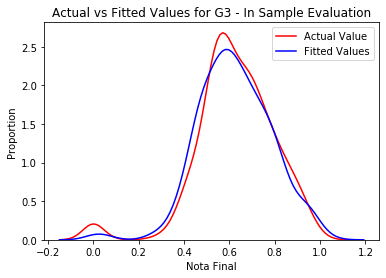

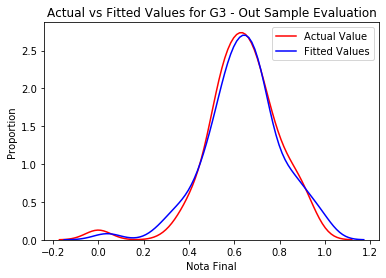

In [59]:
plt.figure()

ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(yhat_insample, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for G3 - In Sample Evaluation')
plt.xlabel('Nota Final')
plt.ylabel('Proportion')

plt.show()
plt.close()
######################
plt.figure()

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(yhat_outsample, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for G3 - Out Sample Evaluation')
plt.xlabel('Nota Final')
plt.ylabel('Proportion')

plt.show()
plt.close()

Actual values line and Fitted Values line are close

<a href="#contents" class="btn btn-success" style="padding:10px;text-decoration:none;">Voltar ao Topo</a>